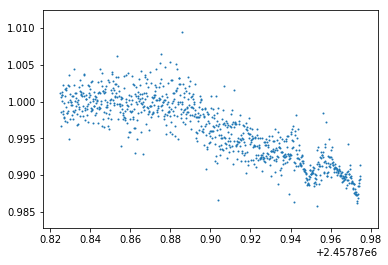

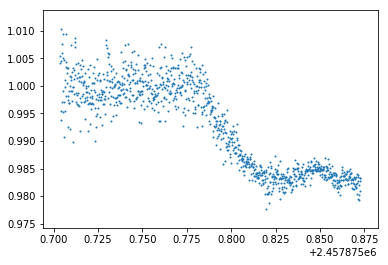

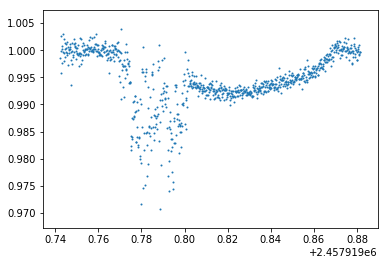

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from glob import glob
from toolkit import PhotometryResults, PCA_light_curve, params_b

paths = sorted(glob('outputs/hat11_*.npz'))

results = [PhotometryResults.load(path) for path in paths]
validation_duration_fractions = [0.2, 0.2, 0.06]
flux_thresholds = [0.85, 0.5, 0.9]
validation_times = [-0.8, -0.8, -0.65]
transit_parameters = params_b 

for result, vdf, ft, vt in zip(results, validation_duration_fractions, 
                               flux_thresholds, validation_times):
    light_curve = PCA_light_curve(result, transit_parameters, plots=False,
                                  validation_duration_fraction=vdf,
                                  buffer_time=5*u.min, flux_threshold=ft,
                                  validation_time=vt)
    plt.figure()
    plt.scatter(result.times, light_curve, s=1)
